In [1]:
%run ../../__init__.py
%load_ext autoreload
%autoreload 2

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
test_dir = "/home/konstantin/personal/Summertime/runs/test/hpatches"

In [3]:
methods = {    
    'shi_disk': {eva_ns.COLOR: 'lightskyblue',  
                 eva_ns.LINE_STYLE: '-.',
                 eva_ns.ALIAS: 'Shi-Tomasi+DISK'},
    
    'sift_disk': {eva_ns.COLOR: 'orange',
                  eva_ns.LINE_STYLE: '-',
                  eva_ns.ALIAS: 'SIFT+DISK'},
    
    'superpoint_disk': {eva_ns.COLOR: 'gold',
                        eva_ns.LINE_STYLE: '-',
                        eva_ns.ALIAS: 'SuperPoint+DISK'},
    
    'r2d2_disk': {eva_ns.COLOR: 'blue',
                  eva_ns.LINE_STYLE: '-',
                  eva_ns.ALIAS: 'R2D2+DISK'},
    
    'keynet_disk': {eva_ns.COLOR: 'red',
                    eva_ns.LINE_STYLE: '-',
                    eva_ns.ALIAS: 'KeyNet+DISK'},
    
    'disk': {eva_ns.COLOR: 'purple',
             eva_ns.LINE_STYLE: '-',
             eva_ns.ALIAS: 'DISK'},
    
    'rekd_disk': {eva_ns.COLOR: 'hotpink',
                  eva_ns.LINE_STYLE: '-',
                  eva_ns.ALIAS: 'REKD+DISK'},
    
    'shiness_disk': {eva_ns.COLOR: 'cyan',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-ST+DISK'}
}

# Classical metrics

In [4]:
evaluation_task = eva_ns.CLASSICAL

In [5]:
methods_disk_mma = {
    eva_ns.BACKEND: 'mma/2k',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: methods,
    
    eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'Mean Matching Accuracy, DISK',
        
        eva_ns.Y_AXIS_LABEL: 'MMA',
        
        eva_ns.SAVE_DIR: 'figures/test/mma',
        eva_ns.SAVE_NAME: 'disk.pdf'
    }
}

In [6]:
methods_disk_rep = {
    eva_ns.BACKEND: 'rep/2k',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: methods,
    
    eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'Repeatability, DISK',
        
        eva_ns.Y_AXIS_LABEL: 'Repeatability',
        
        eva_ns.SAVE_DIR: 'figures/test/rep',
        eva_ns.SAVE_NAME: 'disk.pdf'
    }
}

In [7]:
from source.evaluation.vis import prepare_methods_list

save = False
# save = True

select = [0, 1]

methods_list = prepare_methods_list([methods_disk_mma, methods_disk_rep], select)

In [8]:
from source.evaluation.classical.logging import load_classical_metric_eval

metric_v_list, metric_v_illum_list, metric_v_viewpoint_list = load_classical_metric_eval(test_dir, evaluation_task,
                                                                                         methods_list)

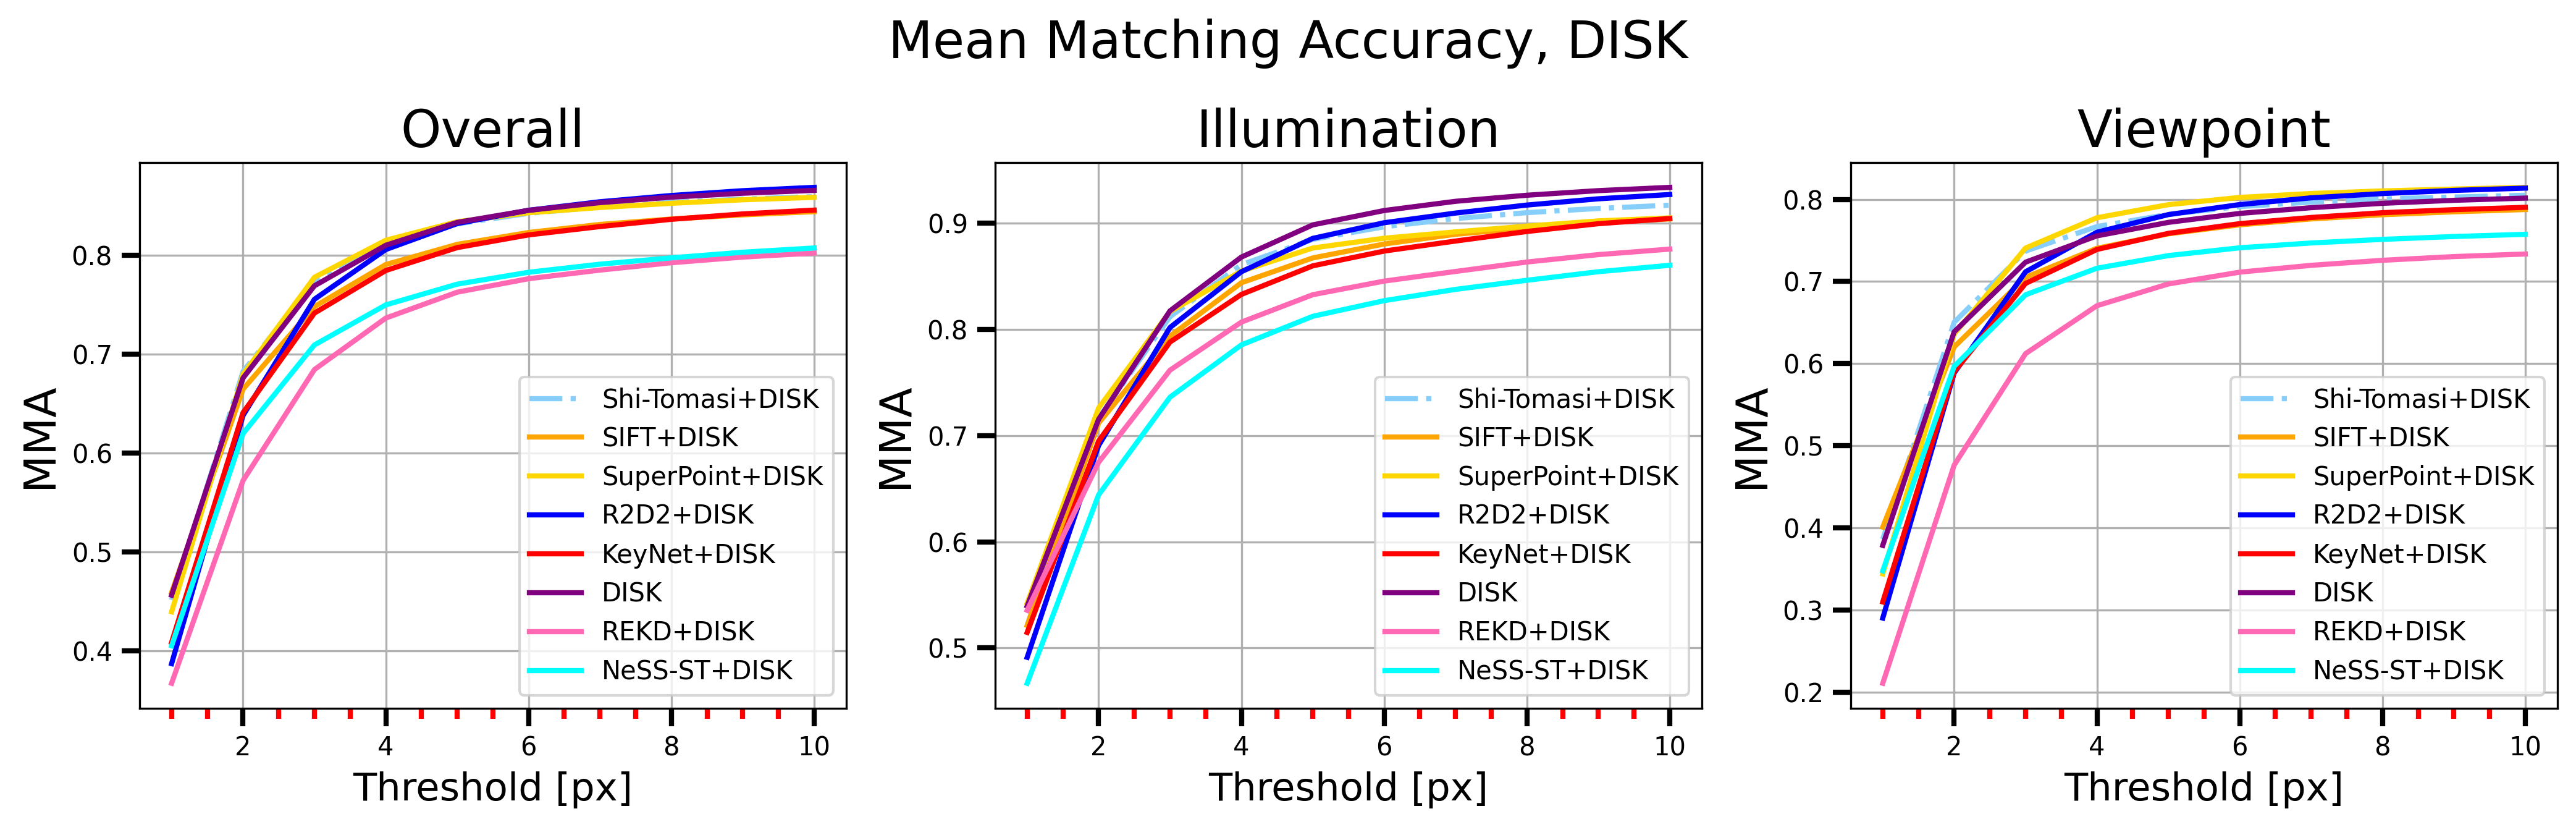

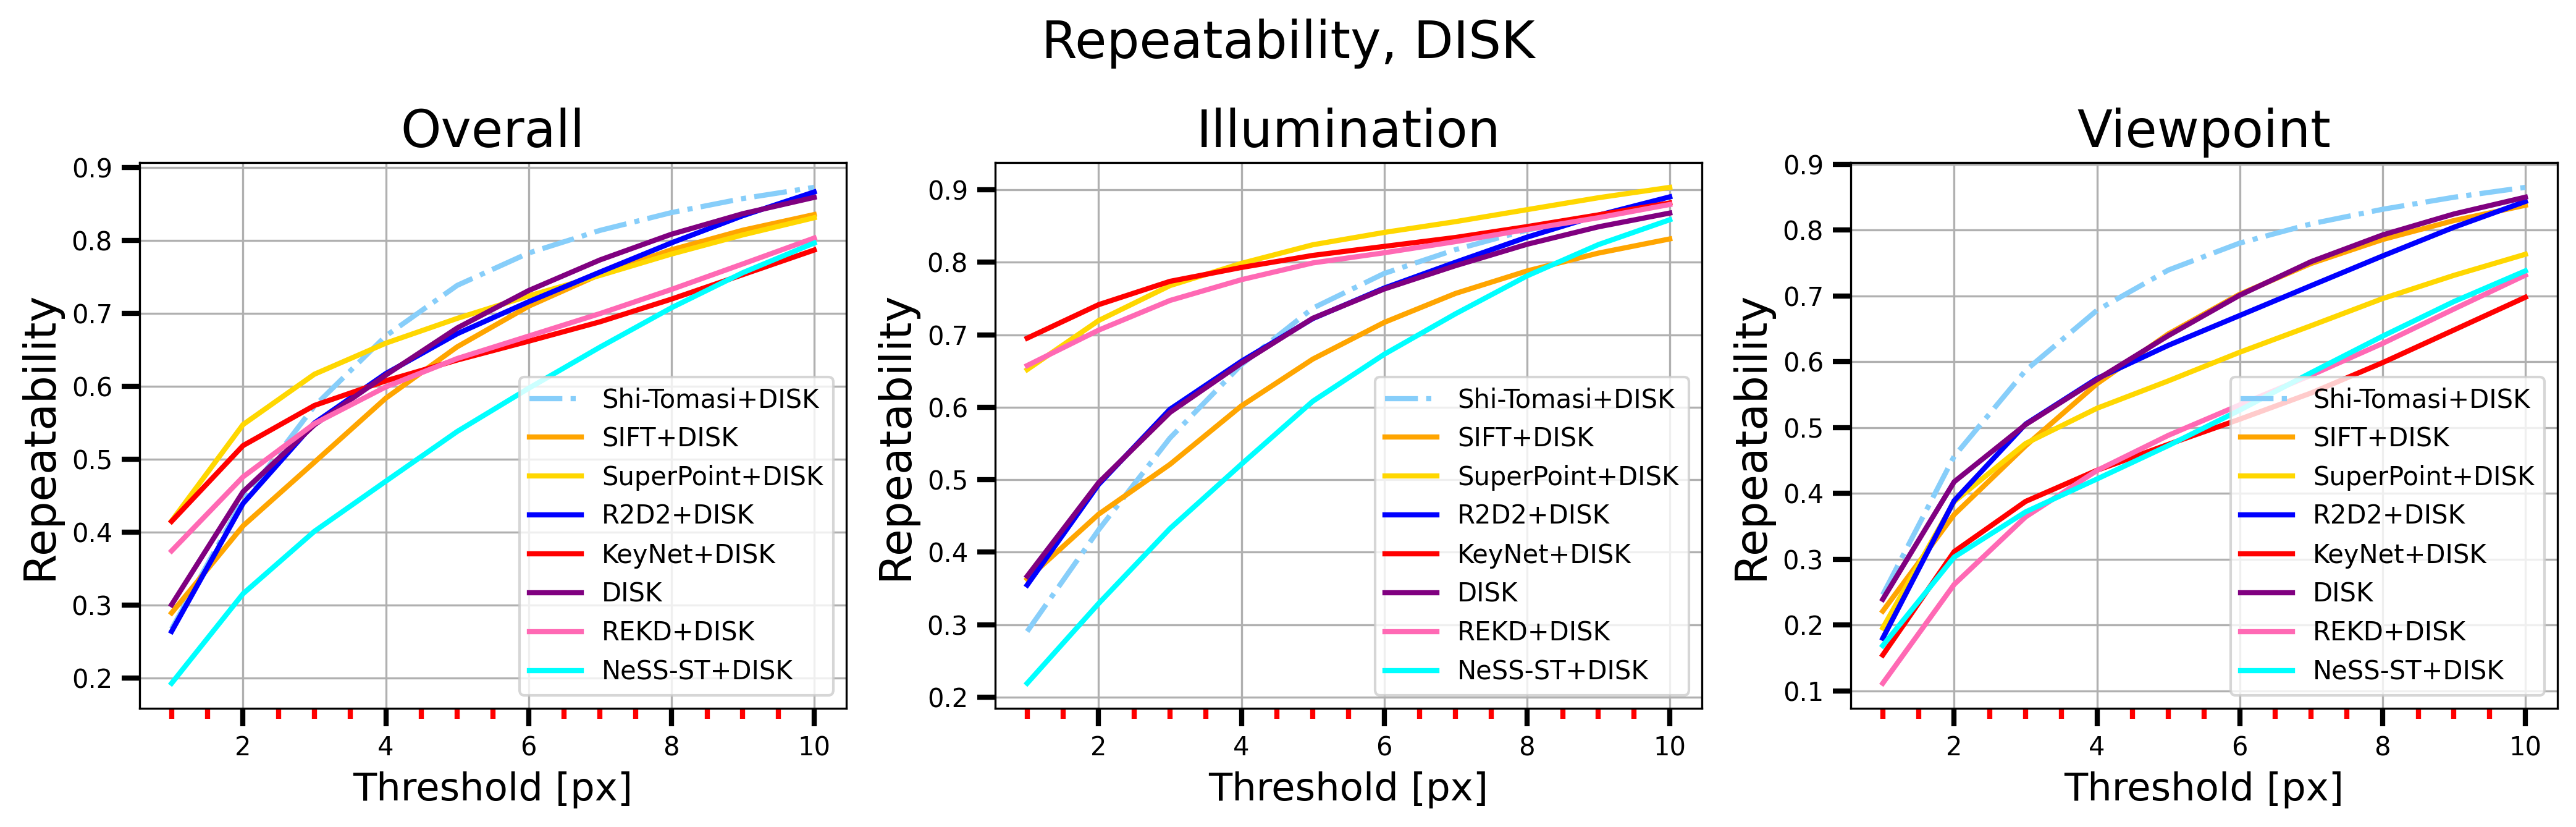

In [9]:
from source.evaluation.classical.vis import ClassicalPlotter

vis_indices = None

ClassicalPlotter(methods_list, 
                 metric_v_list, metric_v_illum_list, metric_v_viewpoint_list,
                 vis_indices).plot_all(save)

# Homography estimation accuracy

## Homography corner re-projection error accuracy

In [15]:
evaluation_task = eva_ns.REL_POSE

In [16]:
methods_disk_h_opencv = {
    eva_ns.BACKEND: 'h_opencv/2k',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: methods,
    
    eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'Homography estimation accuracy, DISK',
        
        eva_ns.Y_AXIS_LABEL: 'Accuracy',
        
        eva_ns.SAVE_DIR: 'figures/test/hcre_acc',
        eva_ns.SAVE_NAME: 'disk.pdf'
    }
}

In [17]:
from source.evaluation.vis import prepare_methods_list

save = False
# save = True

select = None

methods_list = prepare_methods_list([methods_disk_h_opencv], select)

In [18]:
from source.evaluation.rel_pose.logging import load_hpatches_rel_pose_eval

hcr_acc_list, hcr_acc_illum_list, hcr_acc_viewpoint_list = load_hpatches_rel_pose_eval(test_dir, evaluation_task,
                                                                                       methods_list)

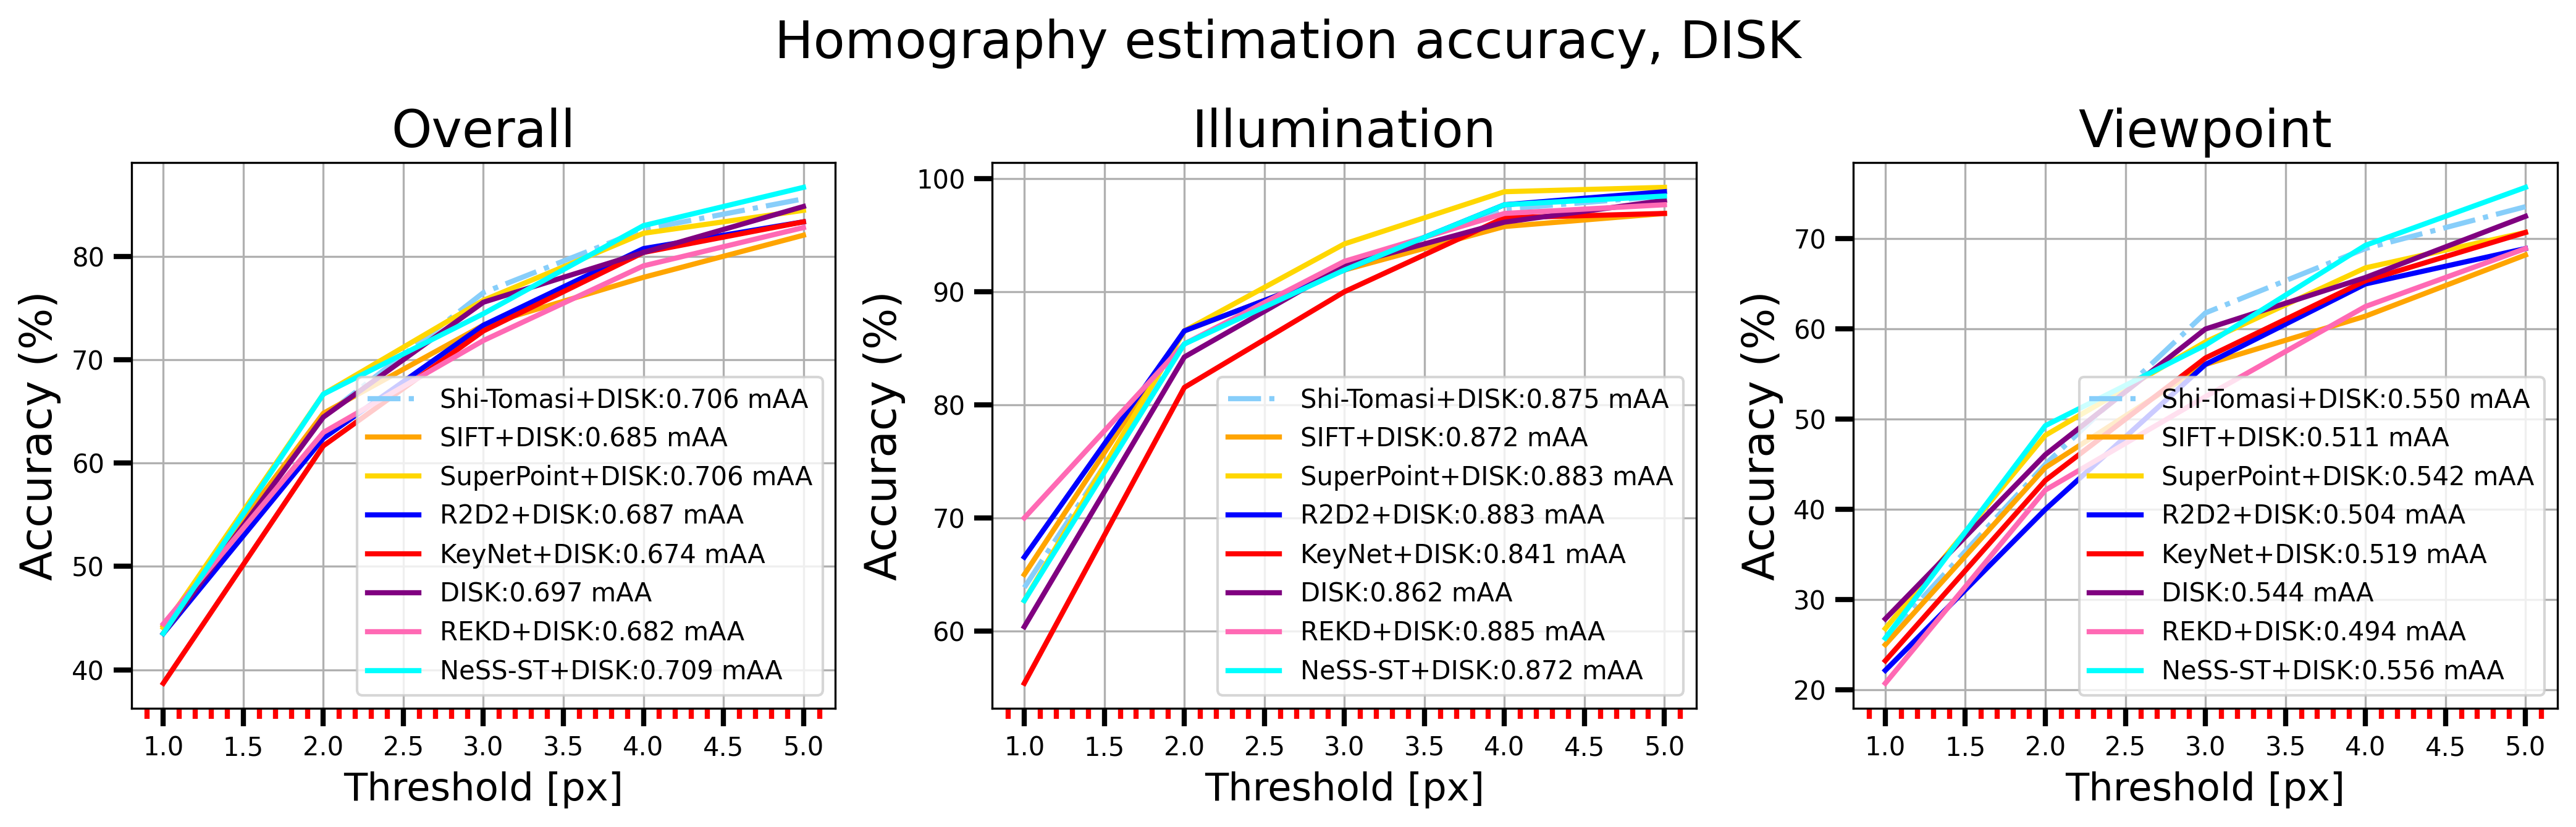

In [19]:
from source.evaluation.rel_pose.vis import HCRAccuracyPlotter

HCRAccuracyPlotter(methods_list,
                   hcr_acc_list, hcr_acc_illum_list, hcr_acc_viewpoint_list).plot_all(save)

# Ablations

## Base detector ablation

In [62]:
evaluation_task = eva_ns.CLASSICAL

In [63]:
base_detector_methods = {
    'shi_disk': {eva_ns.COLOR: 'lightskyblue',  
                 eva_ns.LINE_STYLE: '-.',
                 eva_ns.ALIAS: 'Shi-Tomasi+DISK'},
    
    'harris_disk': {eva_ns.COLOR: 'silver',  
                    eva_ns.LINE_STYLE: '-.',
                    eva_ns.ALIAS: 'Harris+DISK'},
    
    'doh_disk': {eva_ns.COLOR: 'darkorange',  
                 eva_ns.LINE_STYLE: '-.',
                 eva_ns.ALIAS: 'DoH+DISK'},
    
    'log_disk': {eva_ns.COLOR: 'maroon',  
                 eva_ns.LINE_STYLE: '-.',
                 eva_ns.ALIAS: 'LoG+DISK'},
    
    'shiness_disk': {eva_ns.COLOR: 'cyan',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-ST+DISK'},
    
    'dohness_disk': {eva_ns.COLOR: 'peru',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-DoH+DISK'},
    
    'logness_disk': {eva_ns.COLOR: 'indianred',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-LoG+DISK'},
}

In [64]:
base_detector_methods_disk_mma = {
    eva_ns.BACKEND: 'mma/2k',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: base_detector_methods,
    
    eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'Mean Matching Accuracy, DISK',
        
        eva_ns.Y_AXIS_LABEL: 'MMA',
        
        eva_ns.SAVE_DIR: 'figures/test/base/mma',
        eva_ns.SAVE_NAME: 'disk.pdf'
    }
}

In [65]:
base_detector_methods_disk_rep = {
    eva_ns.BACKEND: 'rep/2k',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: base_detector_methods,
    
    eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'Repeatability, DISK',
        
        eva_ns.Y_AXIS_LABEL: 'Repeatability',
        
        eva_ns.SAVE_DIR: 'figures/test/base/rep',
        eva_ns.SAVE_NAME: 'disk.pdf'
    }
}

In [66]:
from source.evaluation.vis import prepare_methods_list

save = False
# save = True

select = None
    
methods_list = prepare_methods_list([base_detector_methods_disk_mma, base_detector_methods_disk_rep], select)

In [67]:
from source.evaluation.classical.logging import load_classical_metric_eval

metric_v_list, metric_v_illum_list, metric_v_viewpoint_list = load_classical_metric_eval(test_dir, evaluation_task,
                                                                                         methods_list)

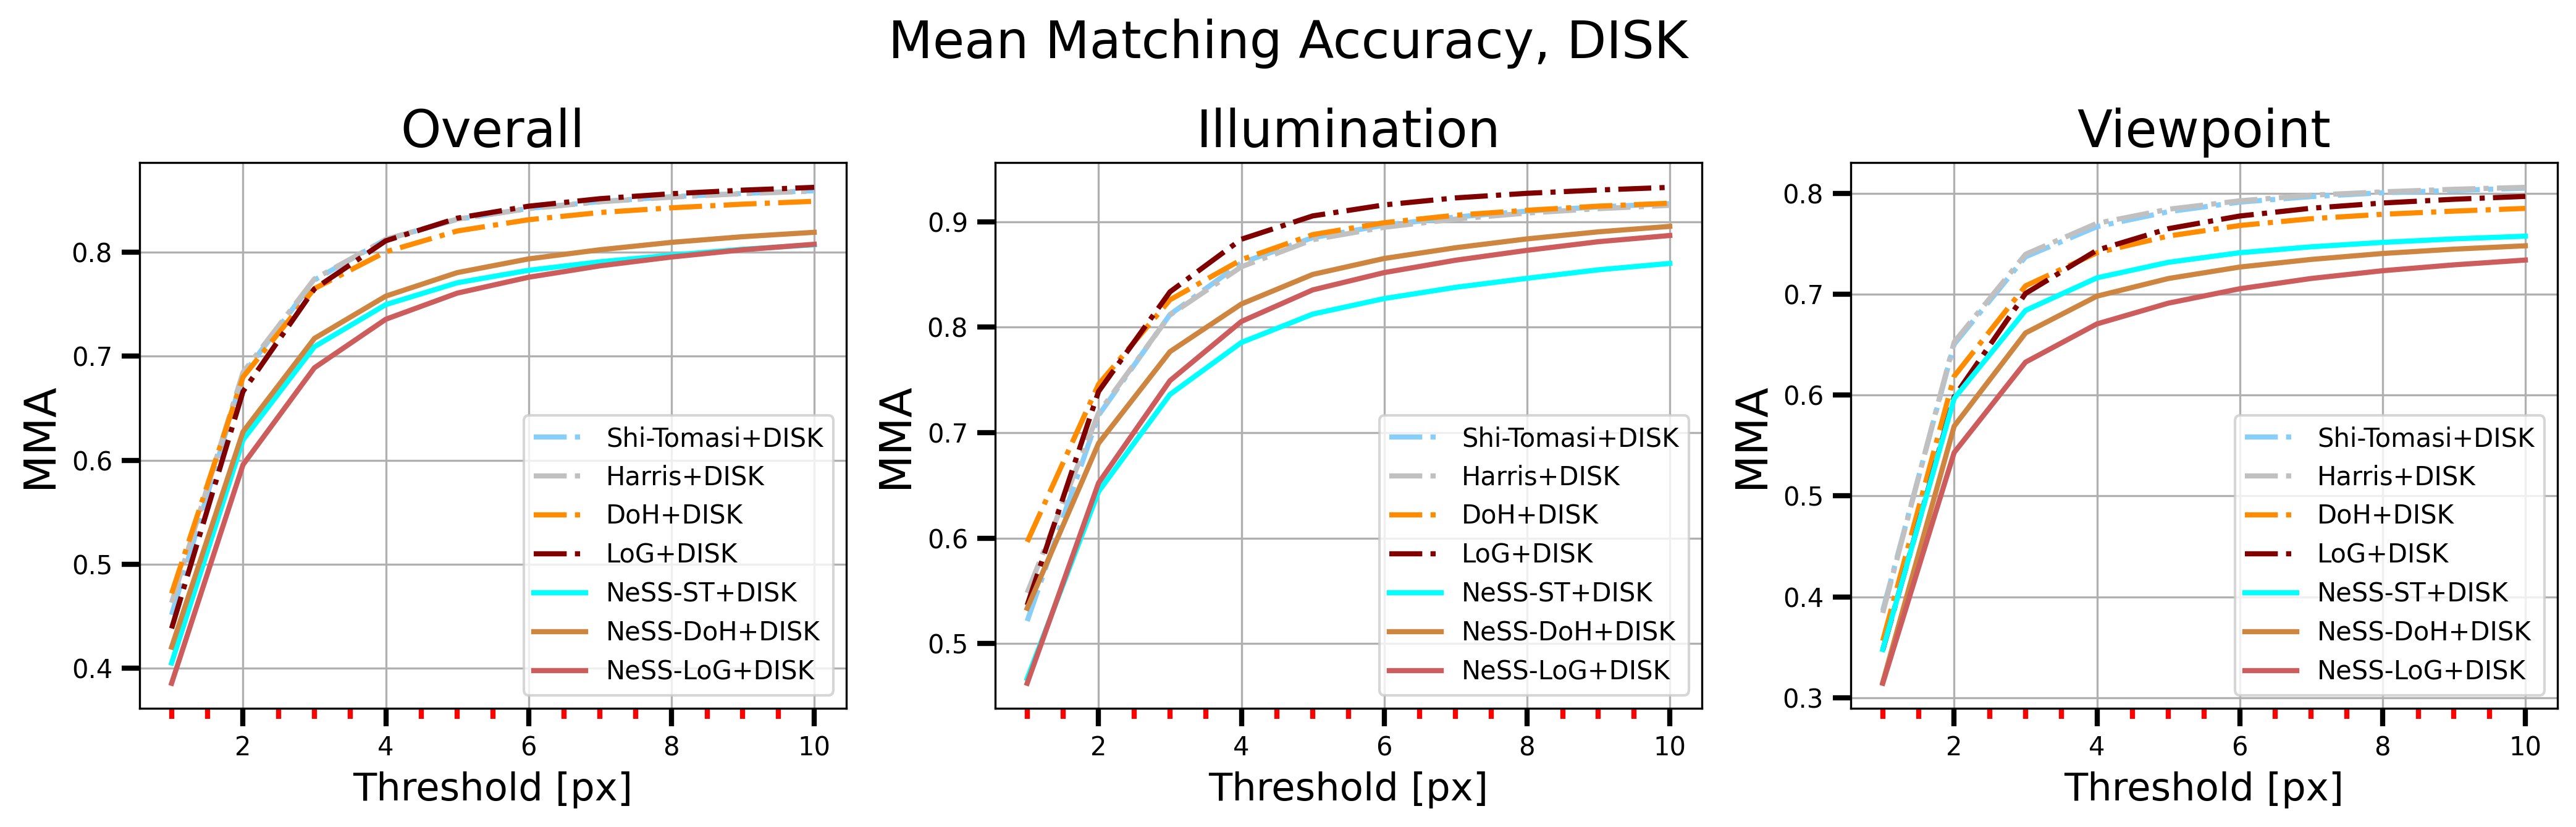

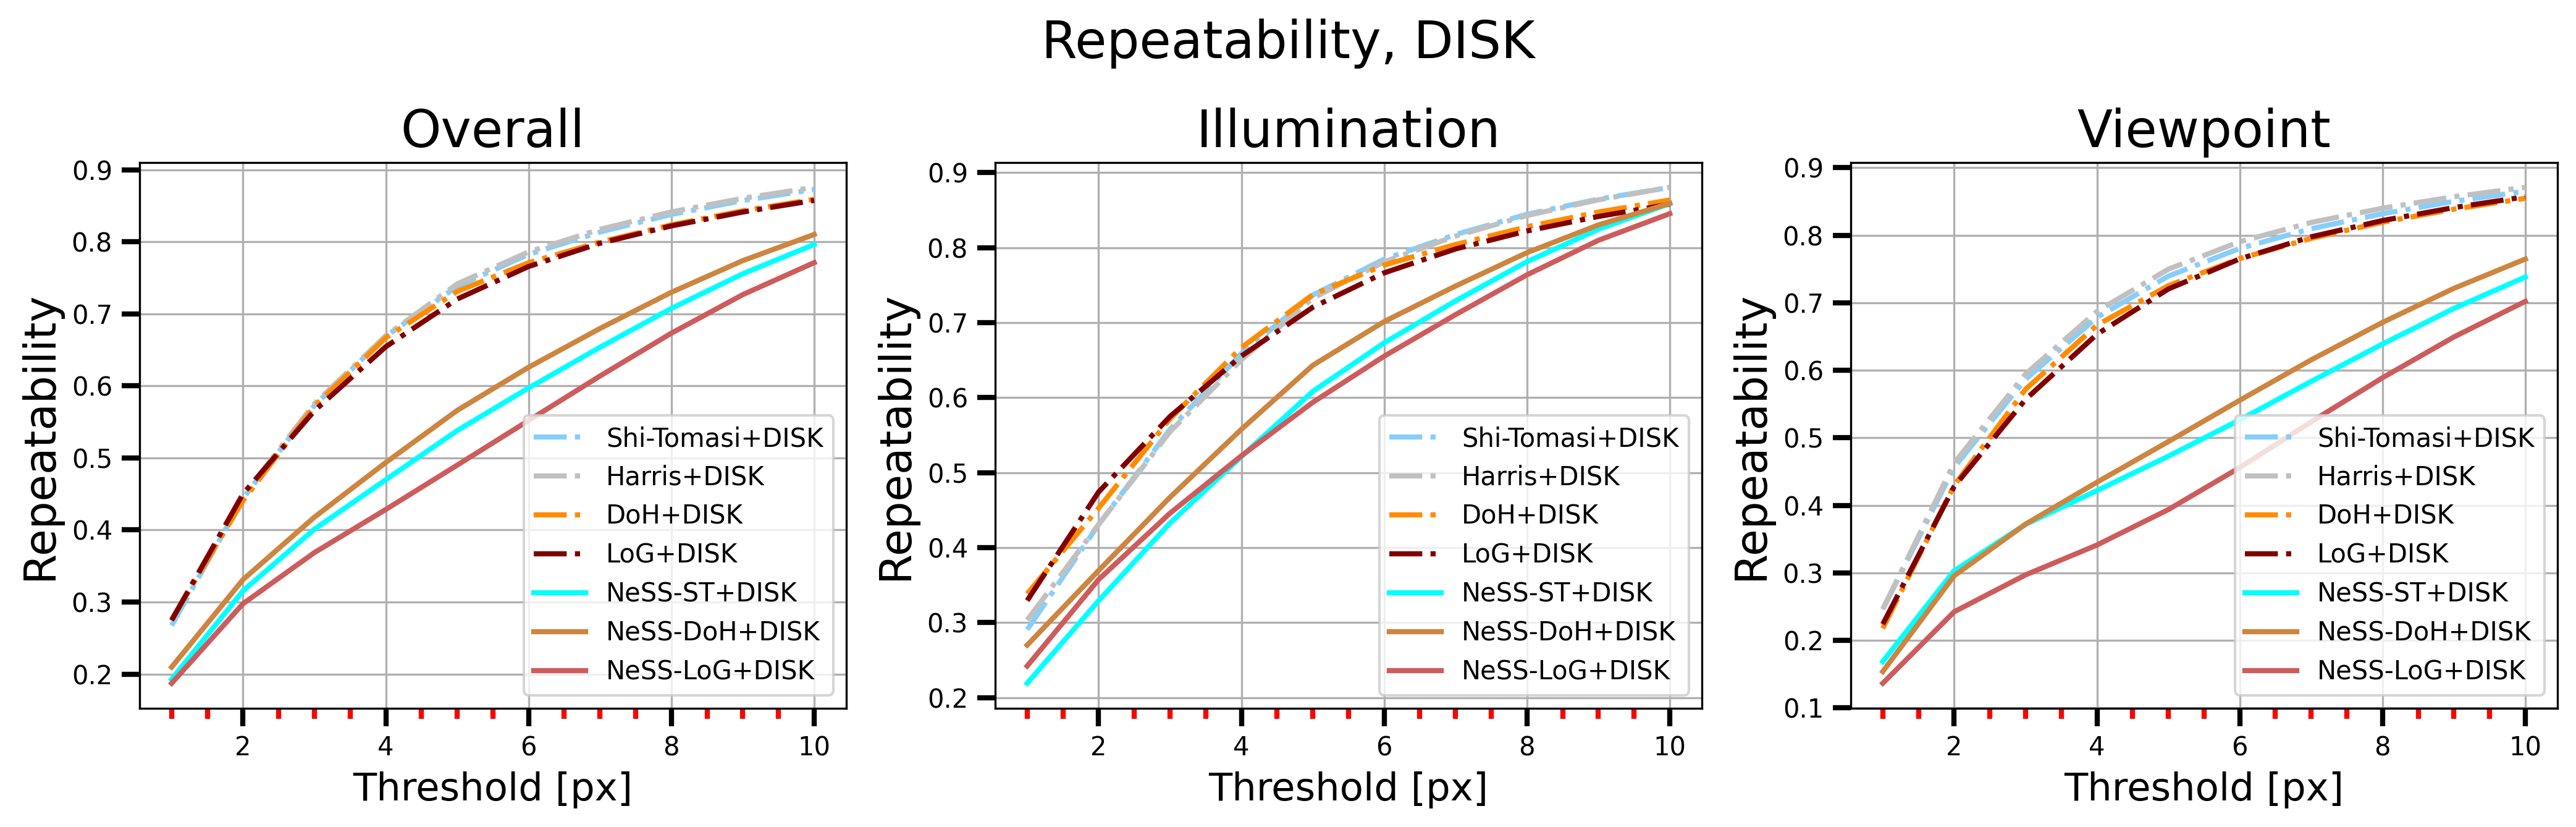

In [68]:
from source.evaluation.classical.vis import ClassicalPlotter

vis_indices = None

ClassicalPlotter(methods_list, 
                 metric_v_list, metric_v_illum_list, metric_v_viewpoint_list,
                 vis_indices).plot_all(save)

## SS, RS, NeSS and NeRS ablation

In [69]:
evaluation_task = eva_ns.CLASSICAL

In [70]:
ss_rs_methods = {
    'shi_disk': {eva_ns.COLOR: 'lightskyblue',  
                 eva_ns.LINE_STYLE: '-.',
                 eva_ns.ALIAS: 'Shi-Tomasi+DISK'},
    
    'shiss_disk': {eva_ns.COLOR: 'coral',
                   eva_ns.LINE_STYLE: '--',
                   eva_ns.ALIAS: 'SS-ST+DISK'},
    
    'shirs_disk': {eva_ns.COLOR: 'linen',
                   eva_ns.LINE_STYLE: '--',
                   eva_ns.ALIAS: 'RS-ST+DISK'},
    
    'shiness_disk': {eva_ns.COLOR: 'cyan',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-ST+DISK'},
    
    'shiners_disk': {eva_ns.COLOR: 'lavender',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeRS-ST+DISK'}
}

In [71]:
ss_rs_methods_disk_mma = {
    eva_ns.BACKEND: 'mma/2k',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: ss_rs_methods,
    
    eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'Mean Matching Accuracy, DISK',
        
        eva_ns.Y_AXIS_LABEL: 'MMA',
        
        eva_ns.SAVE_DIR: 'figures/test/ss_rs/mma',
        eva_ns.SAVE_NAME: 'disk.pdf'
    }
}

In [72]:
ss_rs_methods_disk_rep = {
    eva_ns.BACKEND: 'rep/2k',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: ss_rs_methods,
    
    eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'Repeatability, DISK',
        
        eva_ns.Y_AXIS_LABEL: 'Repeatability',
        
        eva_ns.SAVE_DIR: 'figures/test/ss_rs/rep',
        eva_ns.SAVE_NAME: 'disk.pdf'
    }
}

In [73]:
from source.evaluation.vis import prepare_methods_list

save = False
# save = True

select = None
    
methods_list = prepare_methods_list([ss_rs_methods_disk_mma, ss_rs_methods_disk_rep], select)

In [74]:
from source.evaluation.classical.logging import load_classical_metric_eval

metric_v_list, metric_v_illum_list, metric_v_viewpoint_list = load_classical_metric_eval(test_dir, evaluation_task,
                                                                                         methods_list)

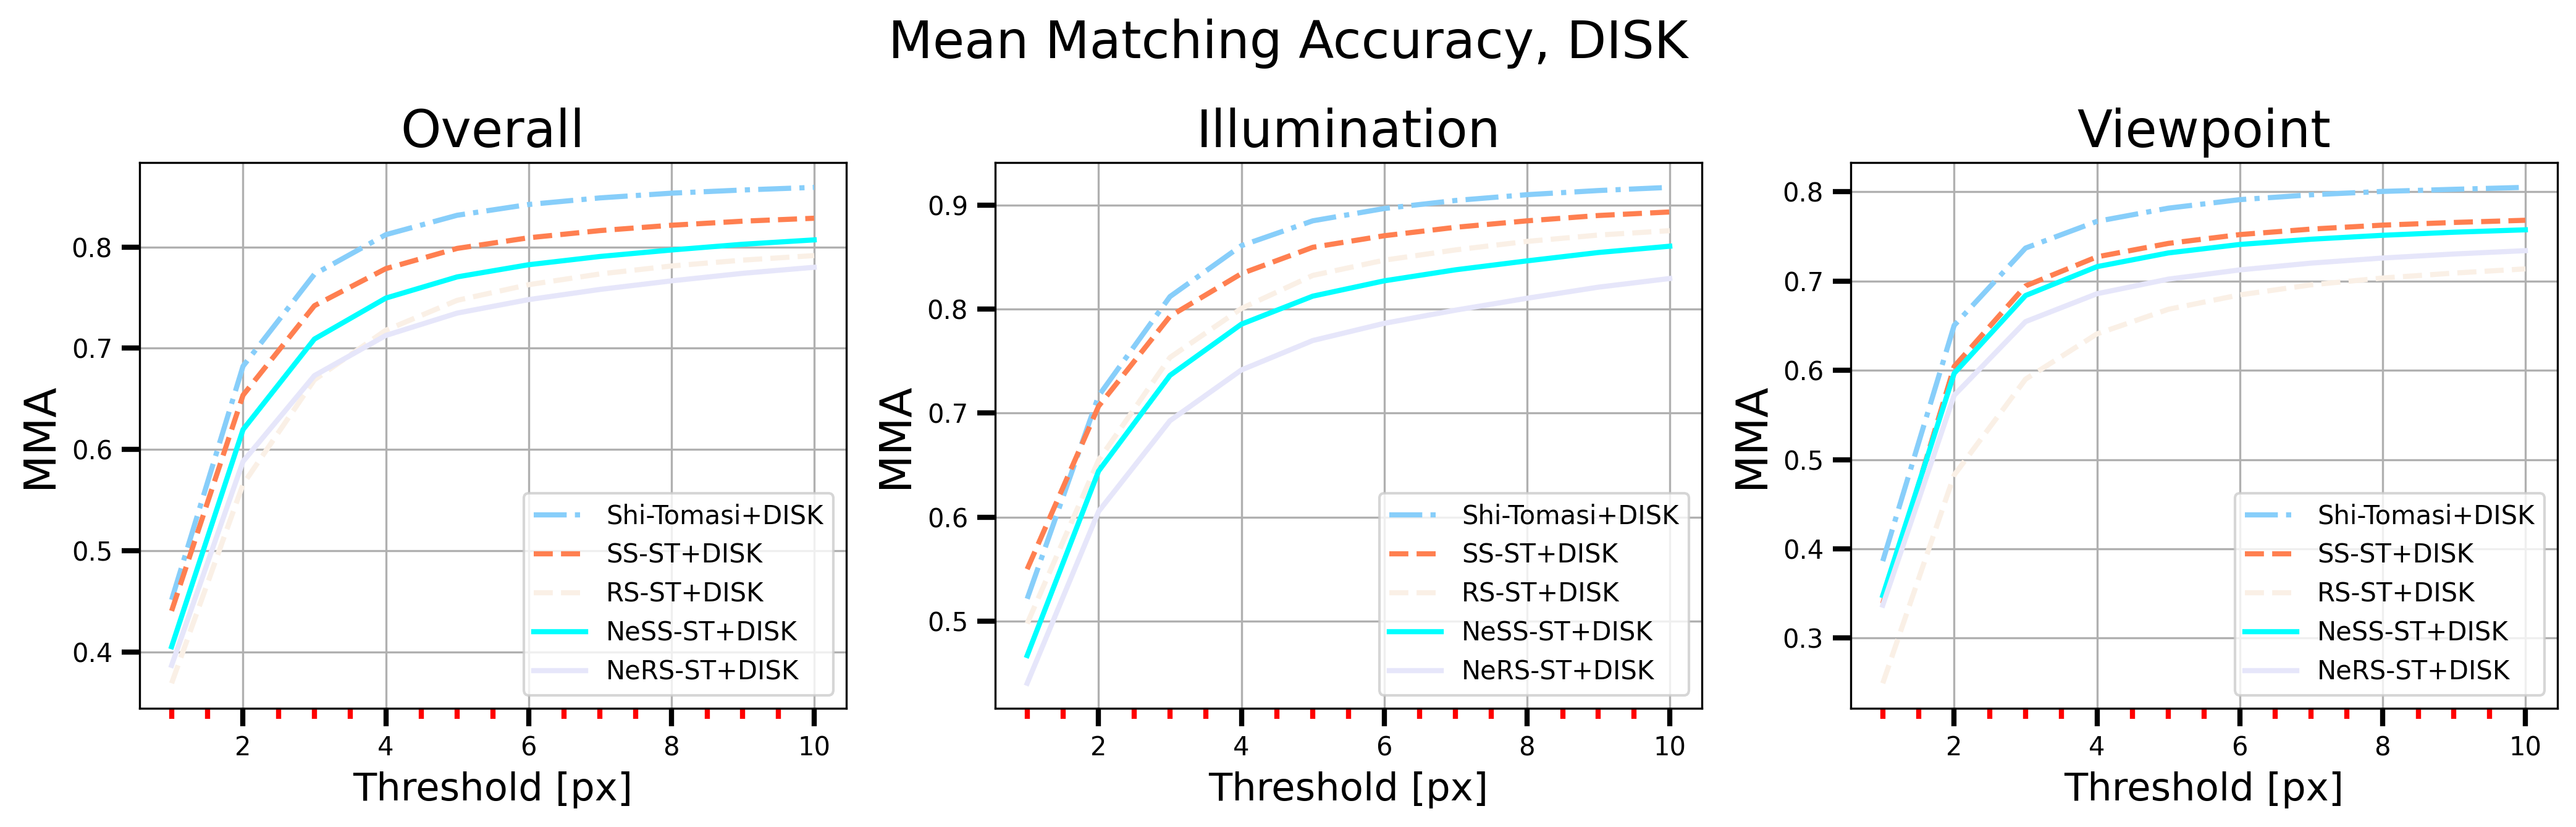

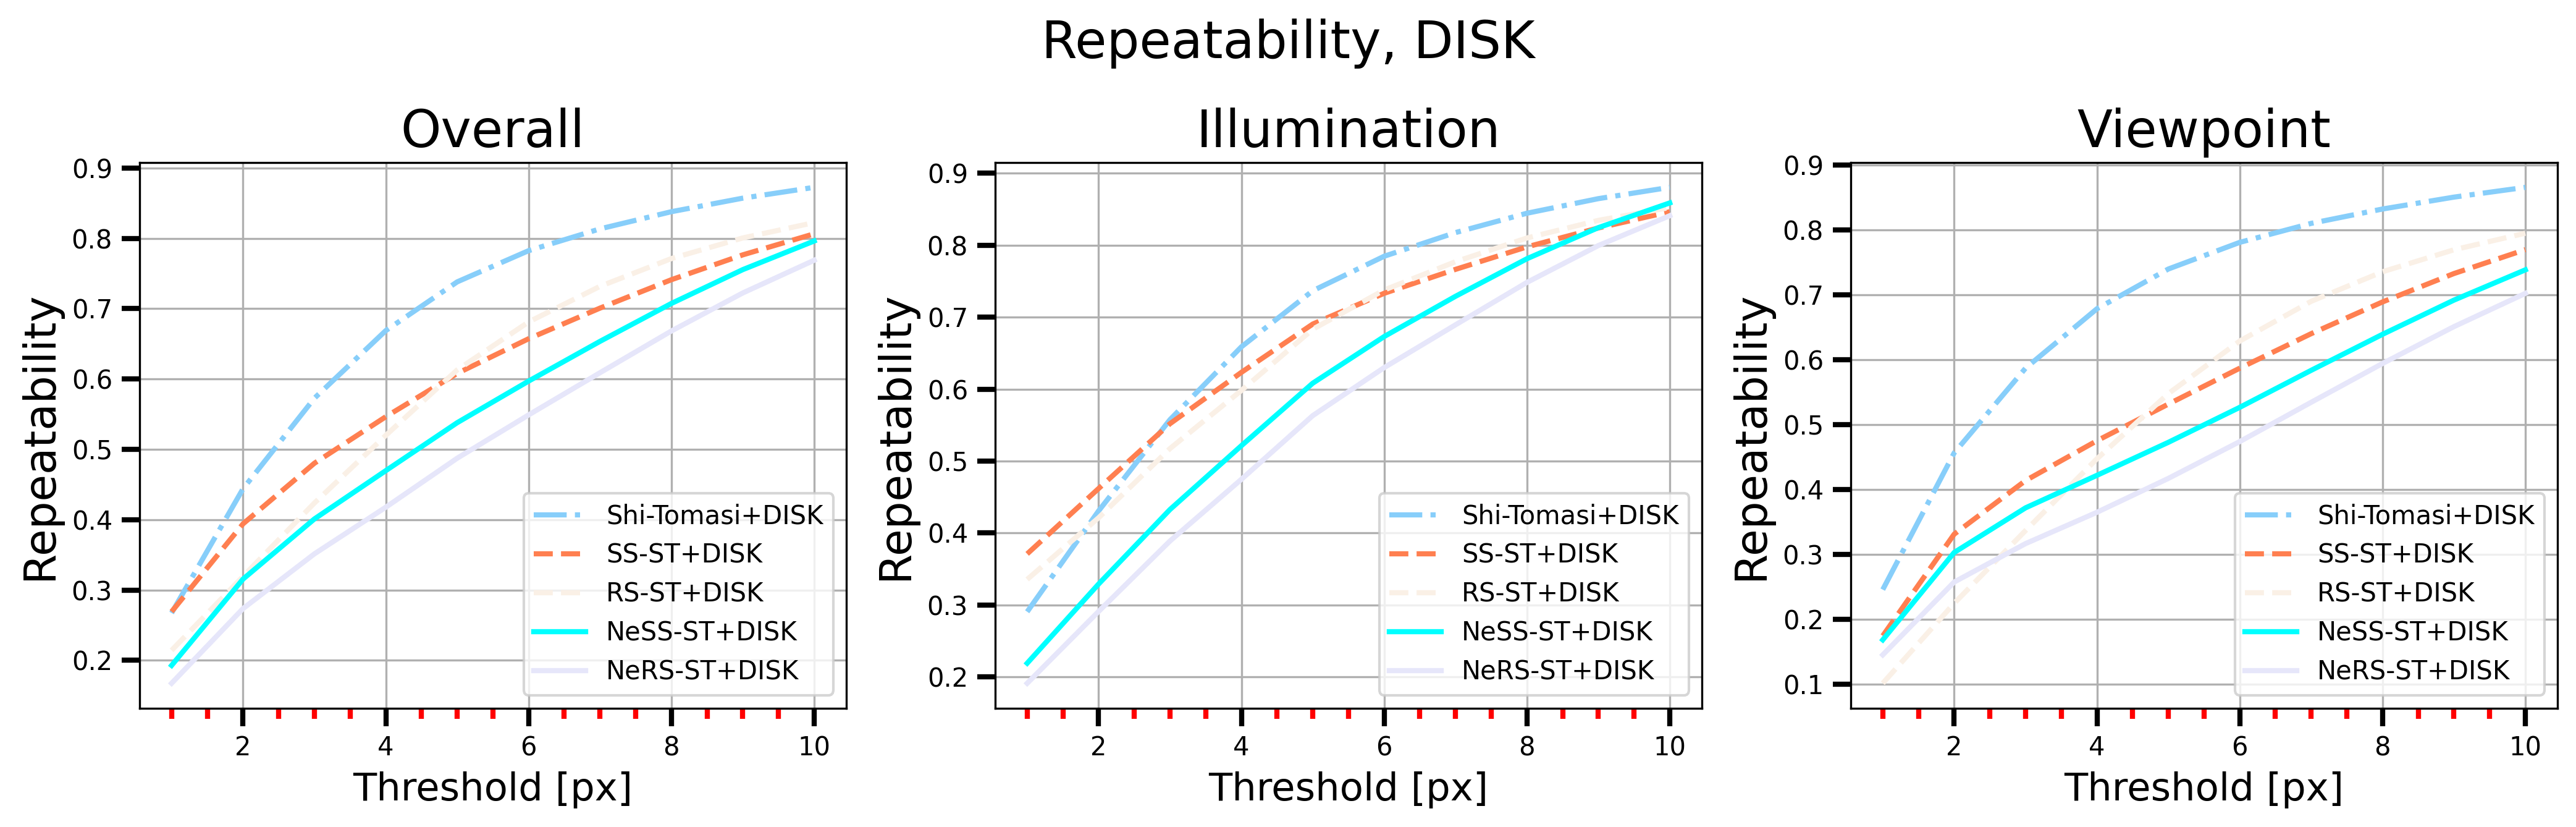

In [75]:
from source.evaluation.classical.vis import ClassicalPlotter

vis_indices = None

ClassicalPlotter(methods_list, 
                 metric_v_list, metric_v_illum_list, metric_v_viewpoint_list,
                 vis_indices).plot_all(save)